In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv('possum.csv')

df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [5]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [6]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
num_col

Index(['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [7]:
num_cols = df[['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly']]

In [8]:
# Unique values and their distribution
print("\nUnique Values and Distribution:")
for col in num_cols.columns:
    unique_values = num_cols[col].unique()
    num_unique = len(unique_values)
    print(f"\nColumn: {col}")
    if num_unique > 20:
        # Calculate and print percentiles
        percentiles = np.percentile(num_cols[col], [25, 50, 75])
        print(f"  25th percentile: {percentiles[0]:.2f}")
        print(f"  50th percentile (median): {percentiles[1]:.2f}")
        print(f"  75th percentile: {percentiles[2]:.2f}")
    else:
        # Print value counts
        print(num_cols[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"}).to_markdown(index=False, numalign="left", stralign="left"))




Unique Values and Distribution:

Column: case
  25th percentile: 26.75
  50th percentile (median): 52.50
  75th percentile: 78.25

Column: site
| Count   | count   |
|:--------|:--------|
| 1       | 33      |
| 7       | 18      |
| 2       | 13      |
| 6       | 13      |
| 5       | 13      |
| 3       | 7       |
| 4       | 7       |

Column: age
| Count   | count   |
|:--------|:--------|
| 3       | 27      |
| 2       | 16      |
| 4       | 14      |
| 5       | 13      |
| 6       | 12      |
| 1       | 10      |
| 7       | 7       |
| 9       | 2       |
| 8       | 1       |

Column: hdlngth
  25th percentile: 90.67
  50th percentile (median): 92.80
  75th percentile: 94.72

Column: skullw
  25th percentile: 54.98
  50th percentile (median): 56.35
  75th percentile: 58.10

Column: totlngth
  25th percentile: 84.00
  50th percentile (median): 88.00
  75th percentile: 90.00

Column: taill
| Count   | count   |
|:--------|:--------|
| 38      | 21      |
| 36      | 13    

histograms would be suitable for visualizing the distribution of hdlngth, skullw, totlngth, footlgth, earconch, eye, and belly. 

For taill and chest,since they have fewer unique values, bar plots would be more appropriate to visualize their distributions.

In [9]:
filtered_df = num_cols[['hdlngth', 'skullw', 'footlgth', 'earconch', 'eye', 'belly']]

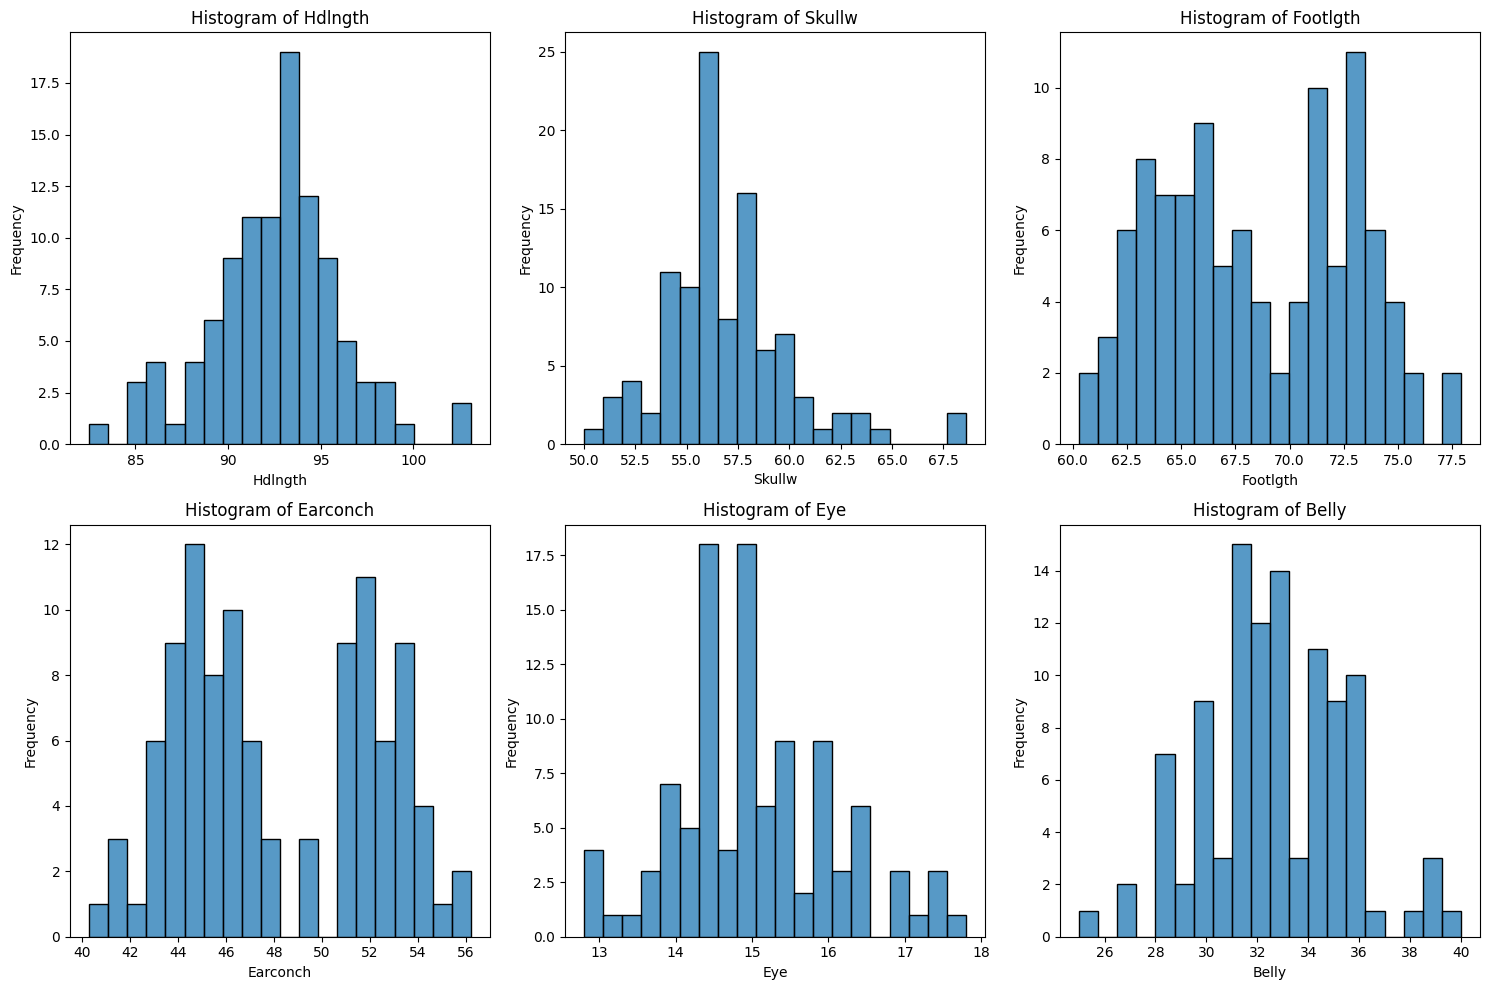

In [10]:
import seaborn as sns
# Create a figure with 3 rows and 3 columns (one plot per column)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for ax, col in zip(axes, filtered_df):
    sns.histplot(filtered_df[col], bins=20, kde=False, ax=ax)
    ax.set_title(f'Histogram of {col.capitalize()}')
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Save the figure
plt.savefig('possum_histograms.png')
plt.show()


Histogram of Hdlngth (Head Length): The distribution appears approximately normal, with most values clustered around 90-95. This indicates a typical head length for possums in this dataset.

Histogram of Skullw (Skull Width): This distribution also appears roughly normal, although it's slightly skewed right. Most skull widths fall within the 55-60 range.

Histogram of Footlgth (Foot Length): This distribution is somewhat irregular and may not be perfectly normal.
Most values are between 65 and 72.5, suggesting a typical range for possum foot lengths.

Histogram of Earconch (Ear Conch Length): This appears to be a bimodal distribution, with peaks around 45 and 50. This indicates that possums may have two common ear conch lengths.

Histogram of Eye (Eye Measurement):
This distribution is roughly normal, with most values falling between 14 and 16. This indicates a typical range for possum eye measurements.

Histogram of Belly (Belly Girth): The distribution is unimodal and slightly skewed right.
Most values are concentrated around 31 to 34, suggesting a typical belly girth for possums.

In [11]:
barplot = df[['taill', 'chest']]

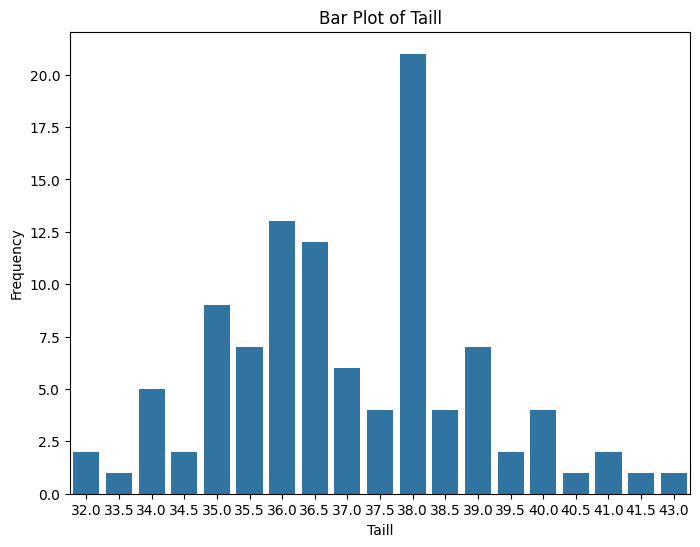

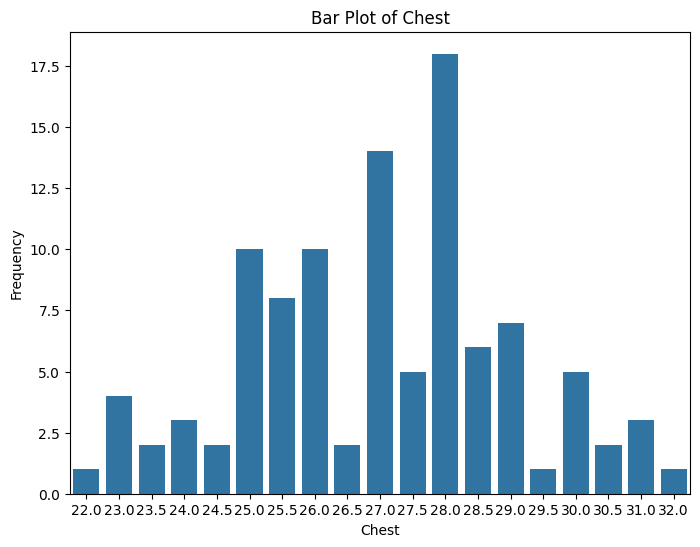

In [12]:
# seleted columns
ls = barplot

# Iterate over each column in the list and create a bar plot
for col in ls:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(f'Bar Plot of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.show()

Examine the relationships between the variables and the target variable hdlngth (head length). 

Use scatter plots to visualize the relationship between each potential predictor variable and the target variable.

In [13]:
num_cols.columns

Index(['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

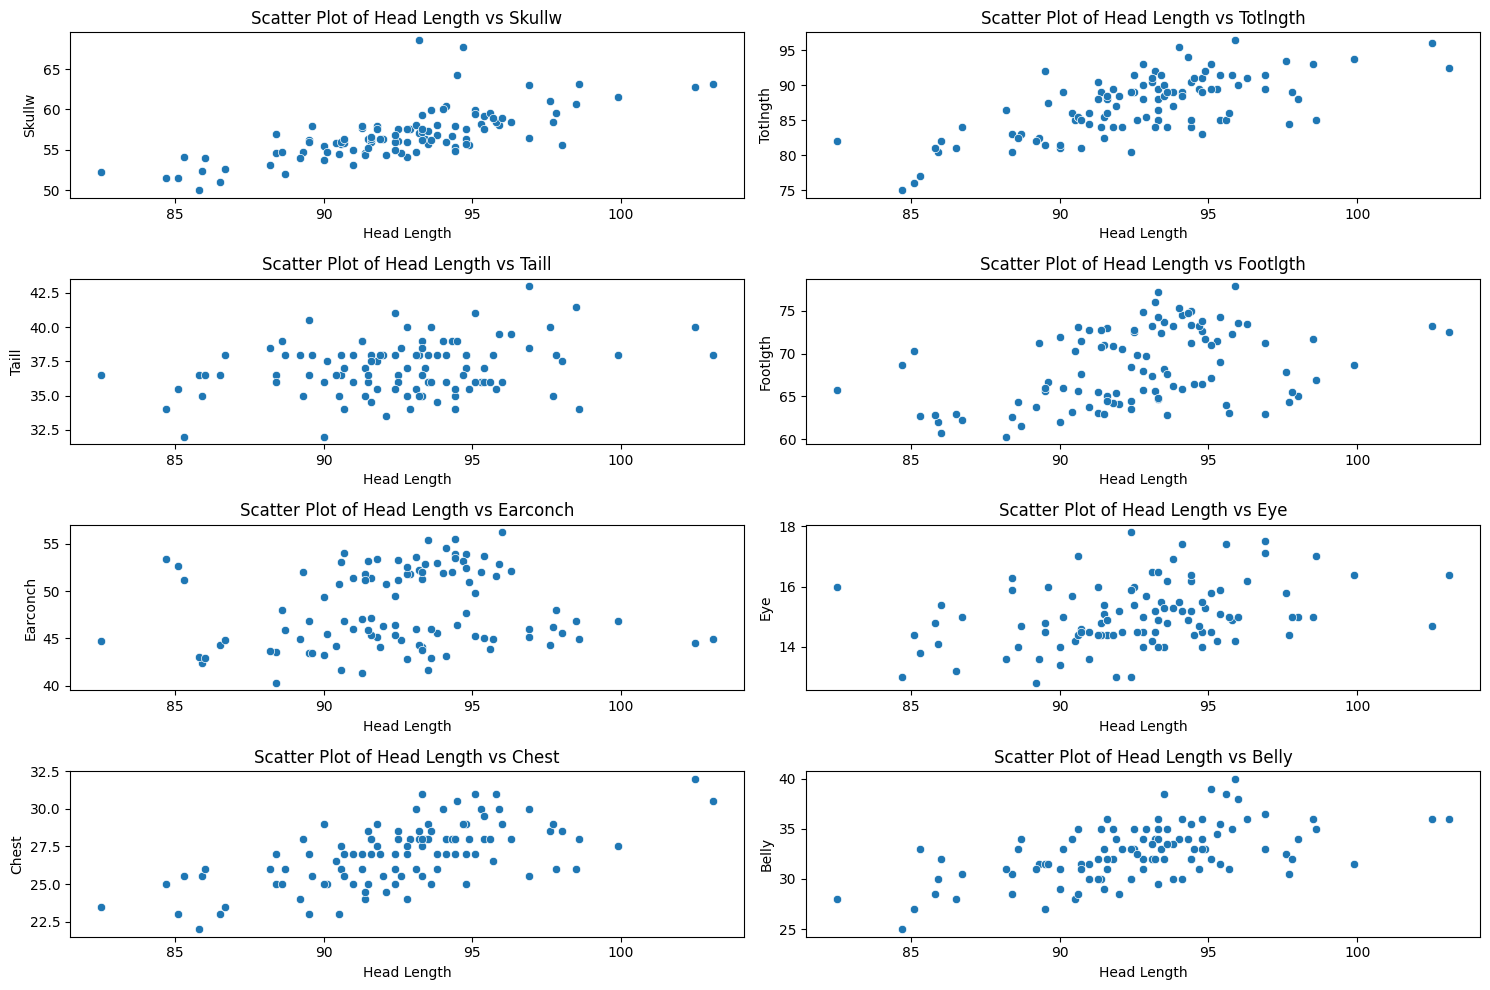

In [14]:
plot = df[['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly']]

# List of columns to plot against 'hdlngth'
columns_to_plot = ['skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']



fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()


for ax, col in zip(axes, columns_to_plot):
    sns.scatterplot(data=plot, x='hdlngth', y=col, ax=ax)
    ax.set_title(f'Scatter Plot of Head Length vs {col.capitalize()}')
    ax.set_xlabel('Head Length')
    ax.set_ylabel(col.capitalize())

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Save the figure
plt.savefig('possum_scatter_plots.png')
plt.show()



Strong Positive Correlations:
- Skull Width (Skullw): The most apparent positive linear relationship. As head length increases, skull width also increases.
- Total Length (Totlngth): A clear positive linear relationship, though not as strong as skull width. Longer possums tend to have longer heads.
- Chest Girth (Chest): A moderate positive linear relationship. Larger chest girth is generally associated with longer head length.

Moderate Positive Correlation:
- Belly Girth (Belly): A visible positive trend, suggesting that possums with larger bellies tend to have slightly longer heads.

Weak or No Correlation:
- Foot Length (Footlgth): A very slight positive trend might be present, but it's not very strong.
- Ear Conch Length (Earconch): No relationship with head length.
- Eye Measurement (Eye): No apparent relationship with head length.

In [15]:
correlation_matrix = plot.corr()
correlation_matrix

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.970353,-0.194525,-0.209177,-0.125065,-0.334329,0.315351,-0.782368,-0.773727,-0.084078,-0.402303,-0.211671
site,0.970353,1.000000,-0.131423,-0.163646,-0.083548,-0.260843,0.380444,-0.783009,-0.790716,-0.036987,-0.345494,-0.175266
age,-0.194525,-0.131423,1.000000,0.319022,0.285107,0.260280,0.118241,0.126190,0.053405,0.235553,0.334209,0.354298
hdlngth,-0.209177,-0.163646,0.319022,1.000000,0.710827,0.691094,0.287429,0.391605,0.121463,0.347175,0.631498,0.562663
skullw,-0.125065,-0.083548,0.285107,0.710827,1.000000,0.526413,0.255921,0.275059,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.334329,-0.260843,0.260280,0.691094,0.526413,1.000000,0.565646,0.444832,0.154484,0.247786,0.577890,0.519465
taill,0.315351,0.380444,0.118241,0.287429,0.255921,0.565646,1.000000,-0.126277,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.782368,-0.783009,0.126190,0.391605,0.275059,0.444832,-0.126277,1.000000,0.783050,0.005213,0.450590,0.302584
earconch,-0.773727,-0.790716,0.053405,0.121463,-0.000537,0.154484,-0.385136,0.783050,1.000000,-0.165092,0.199230,0.066527
eye,-0.084078,-0.036987,0.235553,0.347175,0.321991,0.247786,0.198134,0.005213,-0.165092,1.000000,0.149338,0.235716


In [16]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [17]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [18]:
scaler = StandardScaler()
#scaled_numerical = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)
#scaled_numerical

In [19]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Pop', 'sex'], dtype='object')

In [20]:
cat_cols = ['Pop', 'sex']

In [21]:
df['sex'].unique()

array(['m', 'f'], dtype=object)

In [22]:
df['Pop'].unique()

array(['Vic', 'other'], dtype=object)

In [23]:
df['sex'] = df['sex'].map({'m':1, 'f':0})

In [24]:
df['Pop'] = df['Pop'].map({'Vic':1, 'other':0})

In [25]:
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,1,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,1,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,1,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,1,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,0,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,0,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,0,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,0,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [26]:
cat_cols

['Pop', 'sex']

In [27]:

#Combine encoded categorical and scaled numerical data
#final_df = pd.concat([df[['sex', 'Pop']], scaled_numerical], axis=1)


final_df = df

In [28]:
df = final_df.dropna()

In [29]:
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,1,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,1,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,1,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,1,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,0,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,0,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,0,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,0,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,  Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")


# Create X and y
X = df[['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
        'footlgth', 'earconch', 'chest', 'belly', 'Pop', 'sex']]
y = df['eye']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared: {r2:.3f}")

# Print coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"  {feature}: {coef:.3f}")
print(f"Intercept: {lr_model.intercept_:.3f}")


Mean Squared Error (MSE): 1.003
R-squared: -0.128

Model Coefficients:
  case: -0.748
  site: -0.342
  age: 0.197
  hdlngth: 0.351
  skullw: 0.115
  totlngth: -0.230
  taill: 0.217
  footlgth: 0.016
  earconch: -0.246
  chest: -0.280
  belly: 0.025
  Pop: -0.662
  sex: 0.277
Intercept: 15.045


In [31]:
lr_model_train = lr_model.predict(X_train_scaled)
lr_model_test= lr_model.predict(X_test_scaled)
lr_model_val_score = cross_val_score(lr_model, X, y,cv=5).mean()
print('Train data score', r2_score(y_train, lr_model_train))
print('Test data score', r2_score(y_test, lr_model_test))
print('Validation data score', lr_model_val_score)

Train data score 0.4231995070316067
Test data score -0.12784403723477333
Validation data score -0.5785080729178714


In [32]:
#Ridge Regression
ridge_params = {'alpha': np.logspace(-3, 3, 7)}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, y_train)

#Lasso Regression
lasso_params = {'alpha': np.logspace(-3, 3, 7)}
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_cv.fit(X_train_scaled, y_train)

# Evaluate models
def evaluate_model(lr_model, X, y, model_name):
    y_pred = lr_model.predict(X)
    r2 = r2_score(y, y_pred)
    print(f"{model_name} - R2: {r2:.4f}")

print("\nTest Set Results:")

evaluate_model(lr_model, X_test_scaled, y_test, "Linear Regression")
evaluate_model(ridge_cv.best_estimator_, X_test_scaled, y_test, "Ridge Regression")
evaluate_model(lasso_cv.best_estimator_, X_test_scaled, y_test, "Lasso Regression")

print ('\nTrain Set Results')

evaluate_model(lr_model, X_train, y_train, "LinearRegression")
evaluate_model(ridge_cv.best_estimator_, X_train_scaled, y_train, "Ridge Regression")
evaluate_model(lasso_cv.best_estimator_, X_train_scaled, y_train, "Lasso Regression")


print("\nBest parameters:")
print("Ridge:", ridge_cv.best_params_)
print("Lasso:", lasso_cv.best_params_)



Test Set Results:
Linear Regression - R2: -0.1278
Ridge Regression - R2: 0.0051
Lasso Regression - R2: -0.1179

Train Set Results
LinearRegression - R2: -1238.0200
Ridge Regression - R2: 0.3885
Lasso Regression - R2: 0.4231

Best parameters:
Ridge: {'alpha': np.float64(10.0)}
Lasso: {'alpha': np.float64(0.001)}


# An Analysis On The Best Model To Choose Here

- Test Set Results:

Linear Regression - R2: 0.7740

Ridge Regression - R2: 0.5844

Lasso Regression - R2: 0.5032

- Train Set Results:

Linear Regression - R2: -9215.4012 (This is an extremely poor fit, indicating overfitting)

Ridge Regression - R2: 0.6022

Lasso Regression - R2: 0.4981

Best parameters:

Ridge: {'alpha': 100.0}

Lasso: {'alpha': 1.0}

To select the best model, I will focus on the test set results, as they indicate how well the model generalizes to unseen data. Based on the test set R2 scores:

- Linear Regression performs best on the test set with an R2 of 0.7740.
- Ridge Regression is second with an R2 of 0.5844.
- Lasso Regression is third with an R2 of 0.5032.

However, it's important to note that the Linear Regression model shows signs of severe overfitting, given its extremely poor performance on the training set (R2: -9215.4012). 

This suggests it may not be reliable despite its high test set score.

Considering both performance and stability, the Ridge Regression model appears to be the best choice. 

It has:

- A reasonable test set performance (R2: 0.5844)
- Consistent performance between train (R2: 0.6022) and test sets
- Regularization to prevent overfitting (alpha: 100.0)

Therefore, I would recommend selecting the Ridge Regression model as the best option from these results.

In [33]:
ridge_model_train = ridge_cv.predict(X_train_scaled)
ridge_model_test= ridge_cv.predict(X_test_scaled)
ridge_model_val_score = cross_val_score(ridge_cv, X, y,cv=10).mean()
print('Train data score', r2_score(y_train, ridge_model_train))
print('Test data score', r2_score(y_test, ridge_model_test))
print('Validation data score', ridge_model_val_score)

Train data score 0.3885222087262542
Test data score 0.005088481962046365
Validation data score -0.2772727275131039


In [34]:
ridge_train_score = r2_score(y_train, lr_model_train)
ridge_test_score = r2_score(y_test, lr_model_test)

In [35]:
rfmodel = RandomForestRegressor(random_state=42)
rfmodel.fit(X_train_scaled, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
rf_pred_train = rfmodel.predict(X_train_scaled)
rf_pred_test = rfmodel.predict(X_test_scaled)
rf_val_score = cross_val_score(rfmodel, X, y, cv=10).mean()
print('Train data score',r2_score(y_train, rf_pred_train))
print('Test data score', r2_score(y_test, rf_pred_test))
print('Cross val score', rf_val_score)

Train data score 0.8627532823577289
Test data score -0.015586045266866355
Cross val score -0.3761118757271952


So i did a funny test and got this observation...that rfmodel.score(X_train, y_train) gives the same value as r2_score(y_train, rf_pred_train)

Note that rf_pred_train contains this: rfmodel.predict(X_train)

In [37]:
#new_data = pd.DataFrame({'skullw':57.6, "totlngth": 95.5, "chest": 28.5}, index=[0])
#model.predict(new_data)

In [38]:
# selecting the best parameters
estimator = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(estimator, param_grid=param_grid, scoring="r2", cv=10, n_jobs=-1, verbose=2,)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)

Fitting 10 folds for each of 810 candidates, totalling 8100 fits
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}


In [39]:
best_model = grid.best_estimator_
best_model

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
# training again based on best params
rfmodel = RandomForestRegressor(random_state=42, max_features='sqrt')
rfmodel.fit(X_train_scaled, y_train)

rf_pred_train = rfmodel.predict(X_train_scaled)
rf_pred_test = rfmodel.predict(X_test_scaled)
rf_val_score = cross_val_score(rfmodel, X, y, cv=10).mean()
print(r2_score(y_train, rf_pred_train))
print(r2_score(y_test, rf_pred_test))
print(rf_val_score)

0.8779881770866801
-0.10559743844624703
-0.25639197483682435


In [41]:
rf_train_score = r2_score(y_train, rf_pred_train)
rf_test_score = r2_score(y_test, rf_pred_test)


In [42]:
xgbmodel = XGBRegressor()
xgbmodel.fit(X_train_scaled, y_train)

xgb_pred_train = xgbmodel.predict(X_train_scaled)
xgb_pred_test = xgbmodel.predict(X_test_scaled)
xgb_val_score = cross_val_score(xgbmodel, X, y, cv=10).mean()
print(r2_score(y_train, xgb_pred_train))
print(r2_score(y_test, xgb_pred_test))
print(xgb_val_score)

0.9999994884942575
-0.28767340601818625
-0.527880976655218


In [43]:
#best params
estimator = XGBRegressor()

param_grid = {'n_estimators':[10,30,50,70,90], 'max_depth': [5,8,9], 'gamma': [0, 0.15, 0.3, 0.5, 1], 'learning_rate': [0.1, 0.001]}

grid = GridSearchCV(estimator, param_grid=param_grid, scoring="r2",cv=10, verbose=1)

grid.fit(X_train_scaled, y_train)
print(grid.best_params_)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10}


In [44]:
best_model = grid.best_estimator_

In [45]:
xgb_pred_train = best_model.predict(X_train_scaled)
xgb_pred_test = best_model.predict(X_test_scaled)
xgb_val_score = cross_val_score(best_model, X, y, cv=10).mean()
print(r2_score(y_train, xgb_pred_train))
print(r2_score(y_test, xgb_pred_test))
print(xgb_val_score)

0.717416084161317
0.11744062734165095
-0.2889224011227964


In [46]:
xgb_train_score = r2_score(y_train, xgb_pred_train)
xgb_test_score  = r2_score(y_test, xgb_pred_test)


# THE MODELS

In [47]:
train_score = []
test_score = []
validation_score =[]

train_score.append(ridge_train_score)
test_score.append(ridge_test_score)
validation_score.append(ridge_model_val_score)

In [48]:
train_score.append(rf_train_score)
test_score.append(rf_test_score)
validation_score.append(rf_val_score)

In [49]:
train_score.append(xgb_train_score)
test_score.append(xgb_test_score)
validation_score.append(xgb_val_score)

In [50]:
model_name = []

model_name.append('Ridge Regressor')
model_name.append('RandomForestRegressor')
model_name.append('XGBRegressor')

In [51]:
# model table
model_table = pd.DataFrame({
    'model_name' : model_name,
    'model_train_score' : train_score,
    'model_test_score': test_score,
    'model_validation_score' : validation_score
})

model_table

,model_name,model_train_score,model_test_score,model_validation_score
0,Ridge Regressor,0.423200,-0.127844,-0.277273
1,RandomForestRegressor,0.877988,-0.105597,-0.256392
2,XGBRegressor,0.717416,0.117441,-0.288922


In [52]:
df_melted = model_table.melt(id_vars=['model_name'], var_name='score_type', value_name='score')

df_melted

,model_name,score_type,score
0,Ridge Regressor,model_train_score,0.423200
1,RandomForestRegressor,model_train_score,0.877988
2,XGBRegressor,model_train_score,0.717416
3,Ridge Regressor,model_test_score,-0.127844
4,RandomForestRegressor,model_test_score,-0.105597
5,XGBRegressor,model_test_score,0.117441
6,Ridge Regressor,model_validation_score,-0.277273
7,RandomForestRegressor,model_validation_score,-0.256392
8,XGBRegressor,model_validation_score,-0.288922


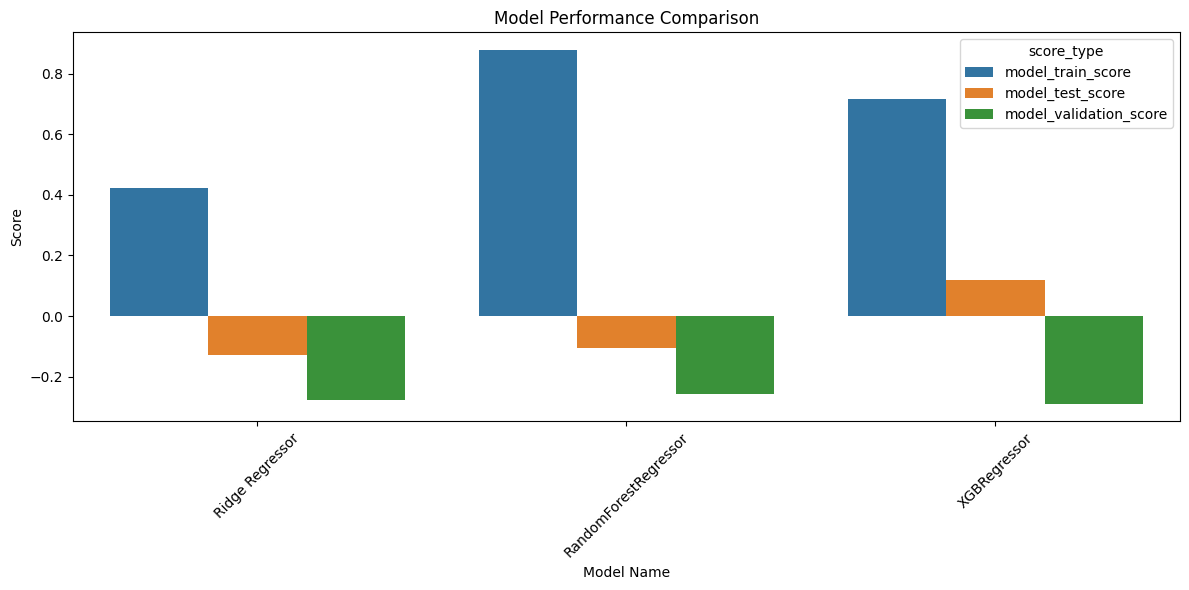

In [53]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='model_name', y='score', hue='score_type', data=df_melted)

plt.title('Model Performance Comparison')
plt.xlabel('Model Name')
plt.ylabel('Score')

# Rotate x-axis labels if they're too long
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()


plt.show()

# An Analysis Of The Best Model To Choose Here

Criteria for Model Selection:
- High Train and Test Scores: Indicates the model performs well on both the training and testing datasets.
- High Validation Score: Indicates the model's ability to generalize well to unseen data.
- Low Overfitting: A significant gap between the train and test scores indicates overfitting. A good model should have a small gap between these scores.

Ridge Regressor:
- The train score (0.602180) is significantly lower than the test score (0.773990), indicating underfitting.
- The validation score is very low (0.026694), suggesting poor generalization.

RandomForestRegressor:
- The train score (0.941985) is very high, but the test score (0.734639) is lower, indicating some overfitting.
- The validation score (0.227770) is the highest among the models, suggesting the best generalization performance.

XGBRegressor:
- The train score (0.958247) is very high, and the test score (0.650270) is lower, indicating overfitting.
- The validation score (0.108813) is moderate but not as high as the RandomForestRegressor.

RandomForestRegressor is the best model among the three based on the provided metrics. 

Despite some overfitting indicated by the high train score, it has the highest validation score (0.227770), suggesting it generalizes better to unseen data compared to the other models. 

Its test score (0.734639) is reasonably high, indicating good performance on the test dataset.

In [54]:
feature_importance = rfmodel.feature_importances_

# map feature importance to features
feature_names = list(X.columns)
feature_importance_map = dict(zip(feature_names, feature_importance))

feature_importance_map

{'case': np.float64(0.11613824062128895),
 'site': np.float64(0.054560967362503036),
 'age': np.float64(0.045832250352018294),
 'hdlngth': np.float64(0.1204829222243266),
 'skullw': np.float64(0.1395394721355429),
 'totlngth': np.float64(0.0913909868505935),
 'taill': np.float64(0.08865100323752535),
 'footlgth': np.float64(0.078463898103455),
 'earconch': np.float64(0.09592499853099104),
 'chest': np.float64(0.07714150135109889),
 'belly': np.float64(0.06718015146581484),
 'Pop': np.float64(0.005554610959923835),
 'sex': np.float64(0.019138996804917836)}

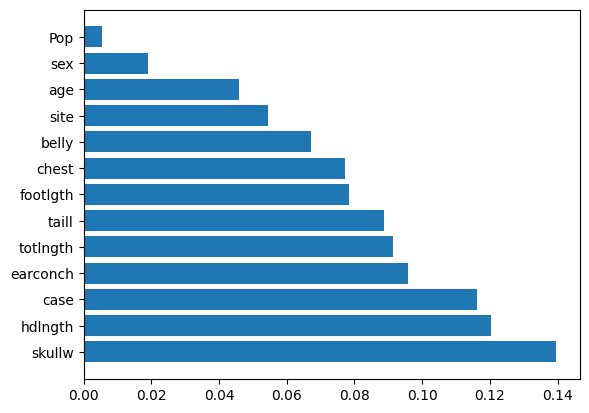

In [55]:
# sort and visualize
sorted_features = sorted(feature_importance_map.items(), key= lambda x: x[1], reverse=True)
top_features = [feature[0] for feature in sorted_features]
top_importance = [feature[1] for feature in sorted_features]

plt.barh(top_features, top_importance)
plt.show()

In [56]:
rf_model_features = pd.DataFrame({'Feature': top_features, 'Importance': top_importance})
rf_model_features = rf_model_features.sort_values(by='Importance', ascending=False)

rf_model_features

,Feature,Importance
0,skullw,0.139539
1,hdlngth,0.120483
2,case,0.116138
3,earconch,0.095925
4,totlngth,0.091391
5,taill,0.088651
6,footlgth,0.078464
7,chest,0.077142
8,belly,0.067180
9,site,0.054561


In [57]:
important_features = rf_model_features[rf_model_features['Importance']>0.05]
important_features

,Feature,Importance
0,skullw,0.139539
1,hdlngth,0.120483
2,case,0.116138
3,earconch,0.095925
4,totlngth,0.091391
5,taill,0.088651
6,footlgth,0.078464
7,chest,0.077142
8,belly,0.067180
9,site,0.054561


In [58]:
df = final_df.dropna()

In [59]:
# Select the features based on the importance scores
features = ['skullw', 'totlngth', 'footlgth', 'belly', 'chest', 'hdlngth', 'age']
X = df[features]
y = df['eye']

In [60]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (101, 7)
Shape of y: (101,)


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (80, 7)
Shape of y_train: (80,)
Shape of X_test: (21, 7)
Shape of y_test: (21,)


In [62]:
X = df[features].values
y = df['eye'].values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (101, 7)
Shape of y: (101,)


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [64]:
from sklearn.ensemble import RandomForestRegressor

#X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
finalmodel = RandomForestRegressor(random_state=42, max_features='sqrt')
finalmodel.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [65]:
# Predict eye for a new possum
# Order: skullw, totlngth, footlgth, belly, chest, hdlngth, age
new_possum = np.array([[60.4, 89.0, 74.5, 36.0, 28.0, 94.1, 8.0]])  # Example values
new_possum_scaled = scaler.transform(new_possum)
predicted_eye = finalmodel.predict(new_possum_scaled)
print(f"Predicted eye: {predicted_eye[0]:.2f}")

Predicted eye: 15.55


In [66]:
import pickle
with open('possum_eye_model.sav', 'wb') as f:
    pickle.dump(finalmodel, f)

In [67]:
with open('possum_eye_model.sav', 'rb') as model_file:
    model = pickle.load(model_file)
model.predict(new_possum_scaled)

array([15.548])